<a href="https://colab.research.google.com/github/donsuryansh75/Cloud-Native-Monitoring-App/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

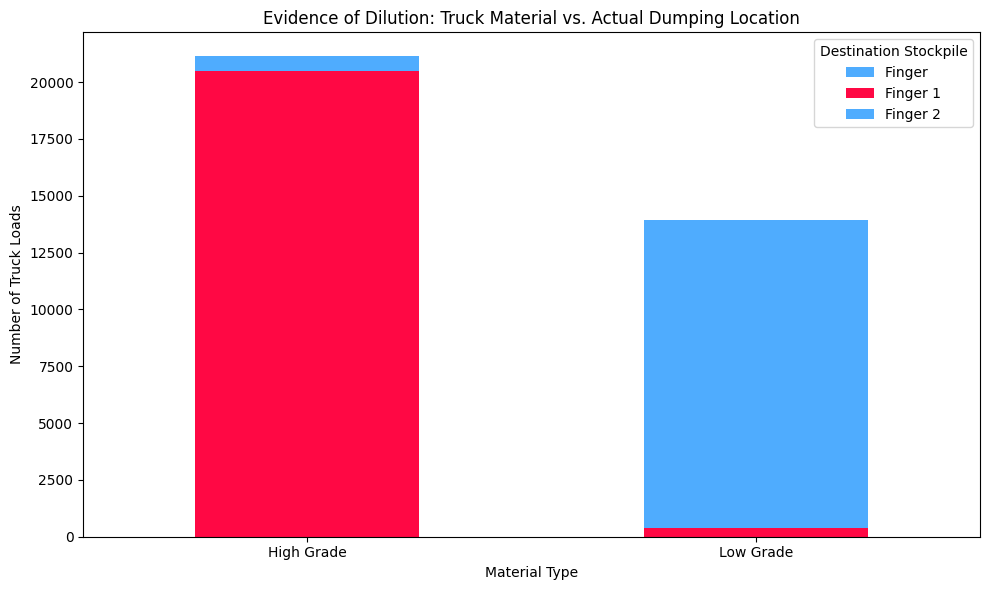

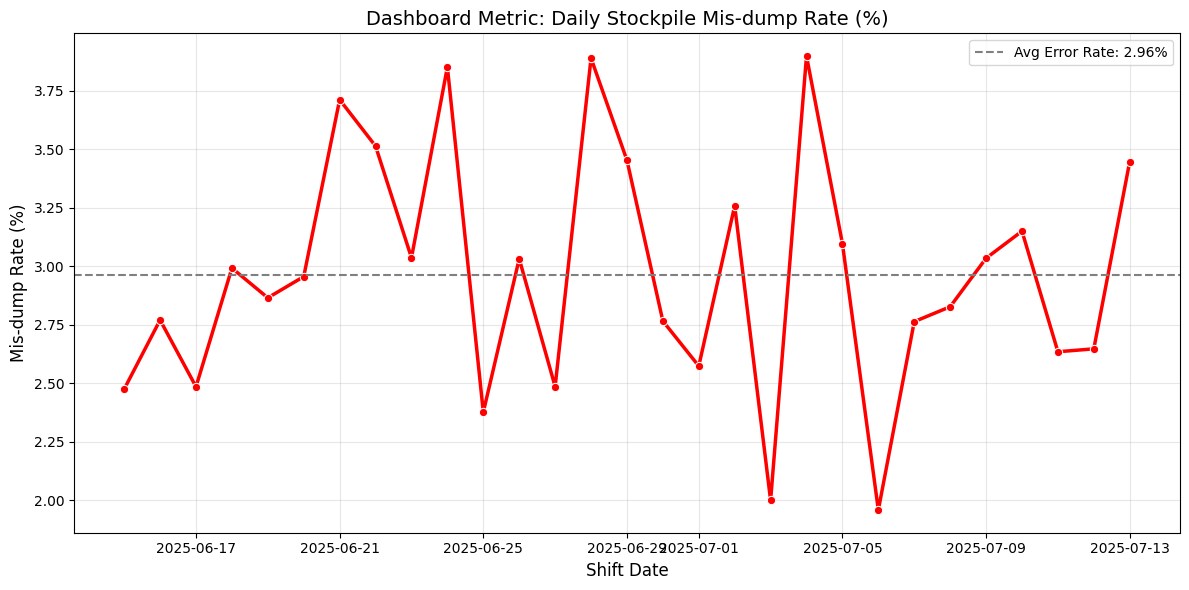

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
truck_logs = pd.read_csv('truck_dump_logs.csv')
rehandle_logs = pd.read_csv('rehandle_logs.csv')

# --- 1. Map the Flow Logic ---
# Identifying the standard routes
# P1-Pit -> Finger 1 (HG)
# P2-Pit -> Finger 2 (LG)
# Fingers -> Main Crusher

# --- 2. Investigate Dilution (Preprocessing) ---
# Definition: HG should go to Finger 1, LG should go to Finger 2
truck_logs['is_misdump'] = False
truck_logs.loc[(truck_logs['material'] == 'High Grade') & (truck_logs['dumping_location'] != 'Finger 1'), 'is_misdump'] = True
truck_logs.loc[(truck_logs['material'] == 'Low Grade') & (truck_logs['dumping_location'] != 'Finger 2'), 'is_misdump'] = True

# Plotting Evidence of Dilution
plt.figure(figsize=(10, 6))
misdump_summary = pd.crosstab(truck_logs['material'], truck_logs['dumping_location'])
misdump_summary.plot(kind='bar', stacked=True, color=['#4facfe', '#ff0844'], ax=plt.gca())
plt.title('Evidence of Dilution: Truck Material vs. Actual Dumping Location')
plt.ylabel('Number of Truck Loads')
plt.xlabel('Material Type')
plt.legend(title='Destination Stockpile')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('dilution_evidence.png')

# --- 3. The "Lead" Pitch Metric ---
truck_logs['shift_date'] = pd.to_datetime(truck_logs['shift_date'])
daily_stats = truck_logs.groupby('shift_date').agg(
    total_loads=('id', 'count'),
    misdumps=('is_misdump', 'sum')
)
daily_stats['misdump_rate'] = (daily_stats['misdumps'] / daily_stats['total_loads']) * 100

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_stats, x='shift_date', y='misdump_rate', marker='o', color='red', linewidth=2.5)
plt.axhline(daily_stats['misdump_rate'].mean(), color='gray', linestyle='--', label=f"Avg Error Rate: {daily_stats['misdump_rate'].mean():.2f}%")
plt.title('Dashboard Metric: Daily Stockpile Mis-dump Rate (%)', fontsize=14)
plt.ylabel('Mis-dump Rate (%)', fontsize=12)
plt.xlabel('Shift Date', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('misdump_rate_metric.png')